In [1]:
import cv2
import numpy as np
import os

from matplotlib import pyplot as plt
from ultralytics import YOLO

In [2]:
model = YOLO('yolov8n.pt')
class_names = model.names

In [15]:
def read_img(img_path):
    try:
        img_abs_path = os.path.join(os.getcwd(), img_path)
        image = cv2.imread(img_path)
    except:
        image = np.zeros((768, 1024, 3), dtype=np.uint8)
    return image

In [9]:
def count_objects(image, object_name):

    if object_name.lower() not in class_names.values():
        image = cv2.putText(image, f"Object {object_name} Not Allowed", (200, 200), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.0, color=(0, 0, 255), thickness=3)
        return image

    object_count = 0
    model_results = model(image, stream=True)
    for result in model_results:
        boxes = result.boxes
        for box in boxes:
            x1, y1, x2, y2 = box.xyxy[0]
            x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
            cls = box.cls[0]
            name = class_names[int(cls)]

            if name == object_name.lower():
                object_count += 1
                image = cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

    if object_count > 0:
        image = cv2.putText(image, f"{object_count} {object_name} found", (200, 200), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.0, color=(255, 0, 0), thickness=3)
    else:
        image = cv2.putText(image, f"Object {object_name} Not Found", (200, 200), fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=2.0, color=(0, 0, 255), thickness=3)

    return image

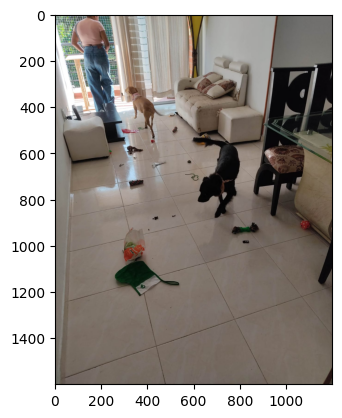

In [7]:
image = read_img("imgs/test.jpg")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


0: 640x480 1 person, 1 bird, 2 dogs, 1 chair, 1 couch, 166.6ms
Speed: 4.0ms preprocess, 166.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 480)


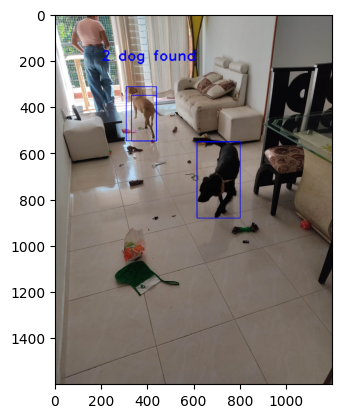

In [10]:
result_image = count_objects(image, "dog")

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()

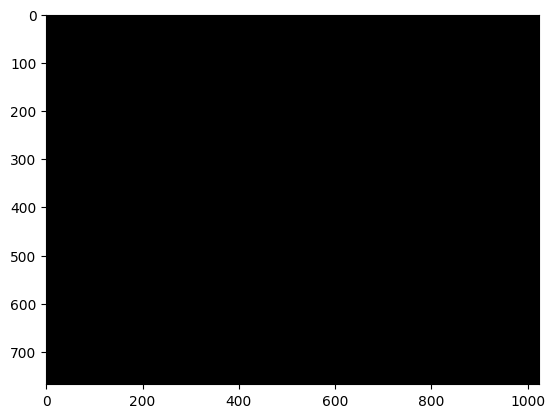

In [16]:
image = read_img("imgs/tests.jpg")

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()


0: 480x640 (no detections), 260.7ms
Speed: 2.5ms preprocess, 260.7ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)


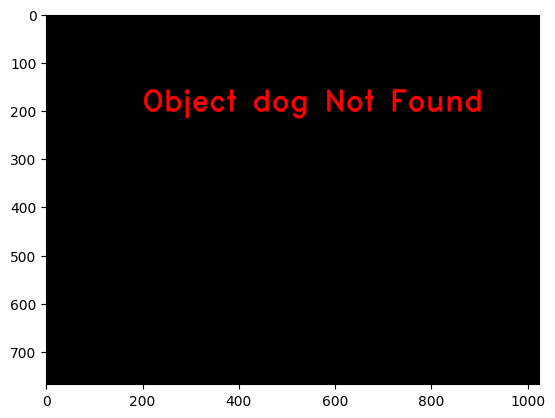

In [17]:
result_image = count_objects(image, "dog")

plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.show()